# Introduction
## Summary
Our company, inMusic Brands Inc., is one of two major DJ equipment companies in the world. The other one is Pioneer DJ, our major competitor. inMusic has 20 brands in DJ, electronic musical instrument, consumer electronics, etc. The DJ equipment brands are Numark, Rane DJ, and Denon DJ.

This social media analysis uses the messages crawled from Twitter. The time period is from July 16th to July 25th. By analyzing the data, we will be able to understand how people react to these brands, including the brands of competitors. Also, it would help understand the key customers in the DJ community. Once the key customers are identified, we will be able to target these key users and then connect to different customer groups.

## Analytics Tool and Dataset
The dataset is collected by Twitter API by searching the brands of our company and the major competitor, "pioneer DJ," "Numark," "Rane DJ," and "Denon DJ." Also, in order to analyze not only these brands but the DJ community. The search keywords include 4 major types of DJ products, "DJ mixer," "DJ controller," "DJ turntable," and "CDJ."

This paper uses Python as the analytics tool, and the data for the analysis contains 2070 messages.

# Prepare
## Analysis Plan
The analysis plan is to answer the questions.

1. When to post would get more retweets and likes?
2. What are the most common words used in these messages?
3. Which messages are the most sentimental?
4. Which company is more popular by comparing the brands of inMusic to Pioneer DJ?
5. How do different communities connect to each other?
6. How accurate is a model to predict the likes and retweets that the messages are going to get?

## Method
First of all, the appendix shows the process of crawling data from the Twitter API. Then, this analysis will load the .json file with 2070 Twitter messages. The steps of this analysis are as follows.

1. Load the .json files and transform them into dataframes with needed columns
2. Plot a heatmap to understand when to post would get more likes and retweets.
3. Clean the text messages and plot graphics to know the common keywords used in these messages.
4. Plot a line chart to compare the frequency of mentioning inMusic's brands and Pioneer DJ.
5. Plot a network to know where the communities are and who the key users connect to different groups.
6. Build a model to predict the likes and understand how accurate the model is.

# Process
## Data Cleansing
This section involves data cleansing. It is a preparation of the dataset for further analysis. First of all, load the essential pakages.

In [1]:
import pandas as pd
import numpy as np
import html
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import seaborn as sns
from pandas.io.json import json_normalize
from random import randint
import json
import time
import sys
import re
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import igraph as ig
from igraph import Graph
from plotly.graph_objs import *
from PIL import Image
from langdetect import detect_langs
import missingno as msno


Load the .json files and review the data structure. Confirm that there are 2070 messages in the .json file. Then, collect some information we need for further analysis, such as "created_at," "full_text," "retweet_count," "favorite_count," "screen_name, and "retweeted_status."

In [2]:
with open('dj_products_data_4000.json', 'r') as file:
    data = json.load(file)

In [3]:
data[0]

{'created_at': 'Sun Jul 25 11:39:18 +0000 2021',
 'id': 1419260970925498370,
 'id_str': '1419260970925498370',
 'full_text': '"Triple Fire" is hot, hot, hot. Eargasms Du Jour. Volume 3 is a fine example of DJ TurnTable Ty\'s talents. You will enjoy his Beautiful Blends of this collection of hot music.\nhttps://t.co/1vh17kjhSf 05\n#MobileDJ',
 'truncated': False,
 'display_text_range': [0, 212],
 'entities': {'hashtags': [{'text': 'MobileDJ', 'indices': [203, 212]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/1vh17kjhSf',
    'expanded_url': 'https://mixcloud.com/Tomthunkit/triple-f/',
    'display_url': 'mixcloud.com/Tomthunkit/tri…',
    'indices': [176, 199]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_r

In [4]:
df = pd.json_normalize(data)
df = df[['created_at', 'full_text', 'retweet_count', 'favorite_count', 
         'user.screen_name', 'retweeted_status.user.screen_name']]
print(df.shape)
df.head()

(2070, 6)


created_at  \
0  Sun Jul 25 11:39:18 +0000 2021   
1  Sun Jul 25 11:39:16 +0000 2021   
2  Sun Jul 25 11:39:14 +0000 2021   
3  Sun Jul 25 11:22:14 +0000 2021   
4  Sun Jul 25 11:21:32 +0000 2021   

                                           full_text  retweet_count  \
0  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...              0   
1  Get hot mixes of Hip Hop, R&amp;B, Old School,...              0   
2  Check out this delicious EAR CANDY. Beware! Th...              0   
3  GROWN &amp; SEXY 2 is twice as sexy as the fir...              0   
4  DJ Mixer / Controller on Expert Pro possible? ...              0   

   favorite_count user.screen_name retweeted_status.user.screen_name  
0               0     TurntableTy1                               NaN  
1               0         VippusaO                               NaN  
2               0  TomthunkitsMind                               NaN  
3               0     TurntableTy1                               NaN  
4               0     devialetchat                               NaN

In [5]:
#Rename the columns
df = df.rename(columns={"created_at": "date", 'full_text':'text', 
                              'retweet_count':'retweets', 'favorite_count':'likes',
                             'user.screen_name':'name', 'retweeted_status.user.screen_name':'retweet_from'
                             })
df.head()

date  \
0  Sun Jul 25 11:39:18 +0000 2021   
1  Sun Jul 25 11:39:16 +0000 2021   
2  Sun Jul 25 11:39:14 +0000 2021   
3  Sun Jul 25 11:22:14 +0000 2021   
4  Sun Jul 25 11:21:32 +0000 2021   

                                                text  retweets  likes  \
0  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...         0      0   
1  Get hot mixes of Hip Hop, R&amp;B, Old School,...         0      0   
2  Check out this delicious EAR CANDY. Beware! Th...         0      0   
3  GROWN &amp; SEXY 2 is twice as sexy as the fir...         0      0   
4  DJ Mixer / Controller on Expert Pro possible? ...         0      0   

              name retweet_from  
0     TurntableTy1          NaN  
1         VippusaO          NaN  
2  TomthunkitsMind          NaN  
3     TurntableTy1          NaN  
4     devialetchat          NaN


Detect the types of languages used in the messages by the using detect_langs function from the langdetect package. Choose the posts only in English, and then make sure there is no missing value in the data. After the preparation, there are 2008 messages left in the data frame. 

In [6]:
lang_list = []
for row in df['text']:
    lang_list.append(detect_langs(row))

lang_list[0:5]

[[en:0.9999970978909002],
 [en:0.9999973197860368],
 [en:0.9999970581802251],
 [en:0.9999987415382248],
 [en:0.8556218669347475, ca:0.14347763307353303]]

In [7]:
lang = [str(lang_item).split(':')[0][1:] for lang_item in lang_list]
df = df.assign(language = lang)
df.head()

date  \
0  Sun Jul 25 11:39:18 +0000 2021   
1  Sun Jul 25 11:39:16 +0000 2021   
2  Sun Jul 25 11:39:14 +0000 2021   
3  Sun Jul 25 11:22:14 +0000 2021   
4  Sun Jul 25 11:21:32 +0000 2021   

                                                text  retweets  likes  \
0  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...         0      0   
1  Get hot mixes of Hip Hop, R&amp;B, Old School,...         0      0   
2  Check out this delicious EAR CANDY. Beware! Th...         0      0   
3  GROWN &amp; SEXY 2 is twice as sexy as the fir...         0      0   
4  DJ Mixer / Controller on Expert Pro possible? ...         0      0   

              name retweet_from language  
0     TurntableTy1          NaN       en  
1         VippusaO          NaN       en  
2  TomthunkitsMind          NaN       en  
3     TurntableTy1          NaN       en  
4     devialetchat          NaN       en

In [8]:
df_en = df[df['language'] == 'en']
print(df_en.shape)
df_en.head()

(2006, 7)


date  \
0  Sun Jul 25 11:39:18 +0000 2021   
1  Sun Jul 25 11:39:16 +0000 2021   
2  Sun Jul 25 11:39:14 +0000 2021   
3  Sun Jul 25 11:22:14 +0000 2021   
4  Sun Jul 25 11:21:32 +0000 2021   

                                                text  retweets  likes  \
0  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...         0      0   
1  Get hot mixes of Hip Hop, R&amp;B, Old School,...         0      0   
2  Check out this delicious EAR CANDY. Beware! Th...         0      0   
3  GROWN &amp; SEXY 2 is twice as sexy as the fir...         0      0   
4  DJ Mixer / Controller on Expert Pro possible? ...         0      0   

              name retweet_from language  
0     TurntableTy1          NaN       en  
1         VippusaO          NaN       en  
2  TomthunkitsMind          NaN       en  
3     TurntableTy1          NaN       en  
4     devialetchat          NaN       en


Start cleaning the text messages for keyword analysis. Then, count the words used in the messages by using the word_tokenize function from the nltk pakage. Also, give sentiment polarity and subjectivity cores for the messages. Although there are some missing values in the "retweet_from" column, it is acceptable since not every post is retweeted from someone. This analysis will drop unuseful columns when plotting a network graphic.

In [9]:
stop_words = set(stopwords.words('english'))

def text_cleanup(c):
    clean_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', c)))
    clean_noemoji = clean_unesc.encode('ascii', 'ignore').decode('ascii')
    wt = word_tokenize(clean_noemoji.lower())
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    return ' '.join(wt_filt)

def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

In [10]:
clean_text_list=[]
for text_item in df_en['text']:
    clean_text_list.append(text_cleanup(text_item))

df_en = df_en.assign(text_clean = clean_text_list)
df_en.head()

date  \
0  Sun Jul 25 11:39:18 +0000 2021   
1  Sun Jul 25 11:39:16 +0000 2021   
2  Sun Jul 25 11:39:14 +0000 2021   
3  Sun Jul 25 11:22:14 +0000 2021   
4  Sun Jul 25 11:21:32 +0000 2021   

                                                text  retweets  likes  \
0  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...         0      0   
1  Get hot mixes of Hip Hop, R&amp;B, Old School,...         0      0   
2  Check out this delicious EAR CANDY. Beware! Th...         0      0   
3  GROWN &amp; SEXY 2 is twice as sexy as the fir...         0      0   
4  DJ Mixer / Controller on Expert Pro possible? ...         0      0   

              name retweet_from language  \
0     TurntableTy1          NaN       en   
1         VippusaO          NaN       en   
2  TomthunkitsMind          NaN       en   
3     TurntableTy1          NaN       en   
4     devialetchat          NaN       en   

                                          text_clean  
0  triple fire hot hot hot eargasms du jour volum...  
1  get hot mixes hip hop r b old school dance pop...  
2  check delicious ear candy beware sweet mixes m...  
3  grown sexy 2 twice sexy first one resemblance ...  
4            dj mixer controller expert pro possible

In [11]:
df_tokens = [word_tokenize(token_item) for token_item in df_en['text_clean']]

token_list = []
for i in range(len(df_tokens)):
     token_list.append(len(df_tokens[i]))

df_en = df_en.assign(tokens = token_list)
df_en.head()

date  \
0  Sun Jul 25 11:39:18 +0000 2021   
1  Sun Jul 25 11:39:16 +0000 2021   
2  Sun Jul 25 11:39:14 +0000 2021   
3  Sun Jul 25 11:22:14 +0000 2021   
4  Sun Jul 25 11:21:32 +0000 2021   

                                                text  retweets  likes  \
0  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...         0      0   
1  Get hot mixes of Hip Hop, R&amp;B, Old School,...         0      0   
2  Check out this delicious EAR CANDY. Beware! Th...         0      0   
3  GROWN &amp; SEXY 2 is twice as sexy as the fir...         0      0   
4  DJ Mixer / Controller on Expert Pro possible? ...         0      0   

              name retweet_from language  \
0     TurntableTy1          NaN       en   
1         VippusaO          NaN       en   
2  TomthunkitsMind          NaN       en   
3     TurntableTy1          NaN       en   
4     devialetchat          NaN       en   

                                          text_clean  tokens  
0  triple fire hot hot hot eargasms du jour volum...      24  
1  get hot mixes hip hop r b old school dance pop...      32  
2  check delicious ear candy beware sweet mixes m...      32  
3  grown sexy 2 twice sexy first one resemblance ...      23  
4            dj mixer controller expert pro possible       6

In [12]:
df_en['polarity'] = df_en['text_clean'].apply(sentim_polarity)
df_en['subjectivity'] = df_en['text_clean'].apply(sentim_subject)
df_en.head()

date  \
0  Sun Jul 25 11:39:18 +0000 2021   
1  Sun Jul 25 11:39:16 +0000 2021   
2  Sun Jul 25 11:39:14 +0000 2021   
3  Sun Jul 25 11:22:14 +0000 2021   
4  Sun Jul 25 11:21:32 +0000 2021   

                                                text  retweets  likes  \
0  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...         0      0   
1  Get hot mixes of Hip Hop, R&amp;B, Old School,...         0      0   
2  Check out this delicious EAR CANDY. Beware! Th...         0      0   
3  GROWN &amp; SEXY 2 is twice as sexy as the fir...         0      0   
4  DJ Mixer / Controller on Expert Pro possible? ...         0      0   

              name retweet_from language  \
0     TurntableTy1          NaN       en   
1         VippusaO          NaN       en   
2  TomthunkitsMind          NaN       en   
3     TurntableTy1          NaN       en   
4     devialetchat          NaN       en   

                                          text_clean  tokens  polarity  \
0  triple fire hot hot hot eargasms du jour volum...      24  0.380952   
1  get hot mixes hip hop r b old school dance pop...      32  0.192045   
2  check delicious ear candy beware sweet mixes m...      32  0.371591   
3  grown sexy 2 twice sexy first one resemblance ...      23  0.416667   
4            dj mixer controller expert pro possible       6  0.000000   

   subjectivity  
0      0.771429  
1      0.488068  
2      0.526136  
3      0.777778  
4      1.000000

In [13]:
df_en_date_list = pd.to_datetime(df_en['date'], format='%a %b %d %H:%M:%S +0000 %Y')
df_en = df_en.assign(date = df_en_date_list)
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2069
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2006 non-null   datetime64[ns]
 1   text          2006 non-null   object        
 2   retweets      2006 non-null   int64         
 3   likes         2006 non-null   int64         
 4   name          2006 non-null   object        
 5   retweet_from  339 non-null    object        
 6   language      2006 non-null   object        
 7   text_clean    2006 non-null   object        
 8   tokens        2006 non-null   int64         
 9   polarity      2006 non-null   float64       
 10  subjectivity  2006 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 188.1+ KB


date               0
text               0
retweets           0
likes              0
name               0
retweet_from    1667
language           0
text_clean         0
tokens             0
polarity           0
subjectivity       0
dtype: int64


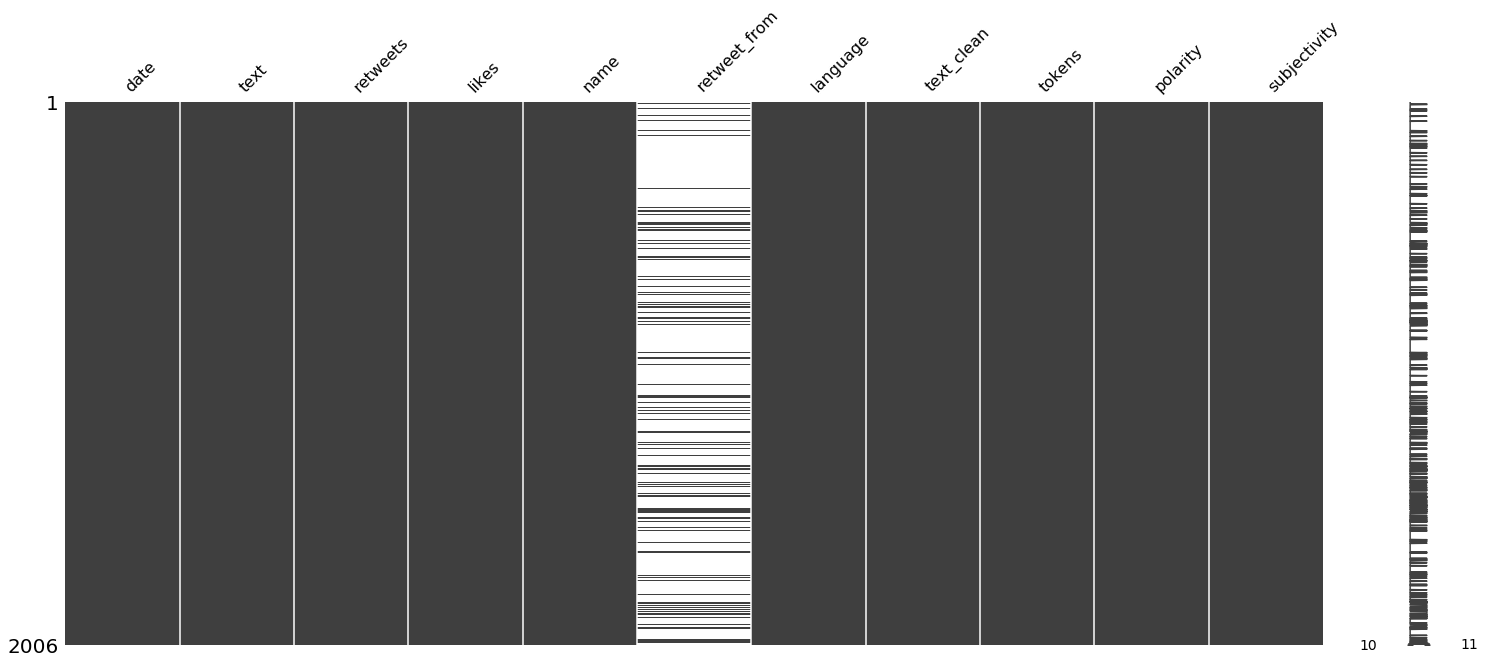

In [14]:
print(df_en.isna().sum())
msno.matrix(df_en)
plt.show()

## Exploratory Data Analysis
### Engagement Analysis
Take a look at the posts using the highest number of words. It turns out these posts are from the same person, TurntableTy1. This user frequently posts the same content, and these posts do not get any likes and retweets. 

In [15]:
df_en.sort_values('tokens', ascending=False).head(10)

date                                               text  \
895  2021-07-21 13:55:20  Check out DJ TurnTable Ty’s latest hot mix of ...   
1982 2021-07-17 08:14:20  Check out DJ TurnTable Ty’s latest hot mix of ...   
52   2021-07-25 04:18:17  Check out DJ TurnTable Ty’s latest hot mix of ...   
1724 2021-07-18 09:40:13  Check out DJ TurnTable Ty’s latest hot mix of ...   
791  2021-07-21 22:25:13  Check out DJ TurnTable Ty’s latest hot mix of ...   
788  2021-07-21 22:42:14  Check out DJ TurnTable Ty’s latest hot mix of ...   
1238 2021-07-20 00:08:11  Check out DJ TurnTable Ty’s latest hot mix of ...   
775  2021-07-21 23:50:18  Check out DJ TurnTable Ty’s latest hot mix of ...   
1835 2021-07-17 19:35:16  Check out DJ TurnTable Ty’s latest hot mix of ...   
1841 2021-07-17 19:01:11  Check out DJ TurnTable Ty’s latest hot mix of ...   

      retweets  likes          name retweet_from language  \
895          0      0  TurntableTy1          NaN       en   
1982         0      0  TurntableTy1          NaN       en   
52           0      0  TurntableTy1          NaN       en   
1724         0      0  TurntableTy1          NaN       en   
791          0      0  TurntableTy1          NaN       en   
788          0      0  TurntableTy1          NaN       en   
1238         0      0  TurntableTy1          NaN       en   
775          0      0  TurntableTy1          NaN       en   
1835         0      0  TurntableTy1          NaN       en   
1841         0      0  TurntableTy1          NaN       en   

                                             text_clean  tokens  polarity  \
895   check dj turntable tys latest hot mix nonstop ...      41  0.197727   
1982  check dj turntable tys latest hot mix nonstop ...      41  0.197727   
52    check dj turntable tys latest hot mix nonstop ...      41  0.197727   
1724  check dj turntable tys latest hot mix nonstop ...      41  0.197727   
791   check dj turntable tys latest hot mix nonstop ...      41  0.197727   
788   check dj turntable tys latest hot mix nonstop ...      41  0.197727   
1238  check dj turntable tys latest hot mix nonstop ...      41  0.197727   
775   check dj turntable tys latest hot mix nonstop ...      41  0.197727   
1835  check dj turntable tys latest hot mix nonstop ...      41  0.197727   
1841  check dj turntable tys latest hot mix nonstop ...      41  0.197727   

      subjectivity  
895       0.567424  
1982      0.567424  
52        0.567424  
1724      0.567424  
791       0.567424  
788       0.567424  
1238      0.567424  
775       0.567424  
1835      0.567424  
1841      0.567424


Here are the top 10 posts with the highest positive sentiment. Interestingly, post No. 2035 is labelled as positive sentiment, but actually, it is sarcasm that it says the device crashes. It will be a subject how this analysis could improve to filter this sort of post.

In [16]:
df_en.sort_values('polarity', ascending=False).head(10)

date                                               text  \
19   2021-07-25 09:29:26  August sales! DJ Controllers at the best price...   
10   2021-07-25 10:24:59  RT @_Willyboy254: I think am the best when I h...   
2035 2021-07-17 01:23:15  Ah yes, that legendary CDJ server crash 🤭🤣 htt...   
18   2021-07-25 09:29:29  📷 August sales! DJ Controllers at the best pri...   
2041 2021-07-17 00:24:43  RT @mizedub: @jantsenmusic the ole slipped and...   
206  2021-07-24 12:49:54  Perfect for by the #bbq or tunes on the move t...   
1024 2021-07-20 22:59:14  @TheCoffeeMage @DCDeacon A DJ turntable would ...   
13   2021-07-25 10:23:17  I think am the best when I have my dj mixer kw...   
2057 2021-07-16 22:35:05  RT @mizedub: @jantsenmusic the ole slipped and...   
119  2021-07-24 21:42:29  @thistroper theyre LITERALLY the best... picke...   

      retweets  likes             name  retweet_from language  \
19           0      0      DjNeevy_254           NaN       en   
10           3      0     _Willyboy254  _Willyboy254       en   
2035         0      1        vampyrrep           NaN       en   
18           0      0      DjNeevy_254           NaN       en   
2041         4      0    DunkMyNuggets       mizedub       en   
206          0      0         djboxire           NaN       en   
1024         0      2  anxioustoebeans           NaN       en   
13           3      5     _Willyboy254           NaN       en   
2057         4      0       Andr3w2010       mizedub       en   
119          0      1  hazyfieldpeople           NaN       en   

                                             text_clean  tokens  polarity  \
19    august sales dj controllers best prices get to...      22       1.0   
10                      rt think best dj mixer kwa simu       7       1.0   
2035                  ah yes legendary cdj server crash       6       1.0   
18    august sales dj controllers best prices get to...      22       1.0   
2041  rt mizedub jantsenmusic ole slipped fell usb e...      12       1.0   
206   perfect bbq tunes move dj2go2touch perfect bac...      13       1.0   
1024  thecoffeemage dcdeacon dj turntable would perfect       6       1.0   
13                         think best dj mixer kwa simu       6       1.0   
2057  rt mizedub jantsenmusic ole slipped fell usb e...      12       1.0   
119   thistroper theyre literally best picked dj mix...       8       1.0   

      subjectivity  
19             0.3  
10             0.3  
2035           1.0  
18             0.3  
2041           0.3  
206            1.0  
1024           1.0  
13             0.3  
2057           0.3  
119            0.3


If we look into the posts getting the highest retweets, we found that the content is not relating to DJ equipment. Twitter searches the keyword "CDJ" on user names. It causes noise inside the data. On the flip side, it tells that the posts with DJ topics do not make many people retweet as normal ones.

In [17]:
df_en.sort_values('retweets', ascending=False).head(10)

date                                               text  \
403  2021-07-23 14:42:39  RT @AyooLikk: How do you just wake up ready to...   
1017 2021-07-20 23:50:23  RT @TheMilfGod: Me on the bowling date https:/...   
480  2021-07-23 07:52:24  RT @PlayWarframe: Get ready for The New War wi...   
322  2021-07-23 21:40:54  RT @13haly: Being called ugly your entire life...   
961  2021-07-21 06:50:12  RT @Jai_Not_Nice: I was born with something in...   
479  2021-07-23 07:53:09  RT @PlayWarframe: Old enemies make their retur...   
959  2021-07-21 06:54:37  RT @onlycaelik: i can’t believe i’m fine &amp;...   
1188 2021-07-20 05:21:02  RT @unkonfined: That move you’re scared to mak...   
1632 2021-07-18 16:06:16  RT @F1: BREAKING: @LewisHamilton wins a dramat...   
254  2021-07-24 07:46:14  RT @speckofyana: tall women are so fine i just...   

      retweets  likes           name  retweet_from language  \
403      57807      0      Ginou_cdj      AyooLikk       en   
1017     50335      0    vincent_cdj    TheMilfGod       en   
480      23849      0  Sirokuma_CDJ_  PlayWarframe       en   
322      19685      0      Ginou_cdj        13haly       en   
961      18044      0      Ginou_cdj  Jai_Not_Nice       en   
479      11340      0  Sirokuma_CDJ_  PlayWarframe       en   
959       9705      0      Ginou_cdj    onlycaelik       en   
1188      9249      0        Voo_Cdj    unkonfined       en   
1632      7628      0    vincent_cdj            F1       en   
254       7300      0      Ginou_cdj   speckofyana       en   

                                             text_clean  tokens  polarity  \
403                rt ayoolikk wake ready talk stfu min       7  0.200000   
1017                         rt themilfgod bowling date       4  0.000000   
480   rt playwarframe get ready new war ultimate ten...      14  0.112121   
322   rt 13haly called ugly entire life suddenly peo...      13 -0.233333   
961   rt born something inside refuses settle averag...      11  0.616667   
479   rt playwarframe old enemies make return origin...      14  0.245455   
959   rt onlycaelik cant believe im fine funny like end       9  0.333333   
1188     rt unkonfined move youre scared make might one       8  0.000000   
1632  rt f1 breaking lewishamilton wins dramatic bri...      17  0.091667   
254        rt speckofyana tall women fine love leggssss       7  0.458333   

      subjectivity  
403       0.500000  
1017      0.000000  
480       0.651515  
322       0.708333  
961       0.333333  
479       0.384848  
959       0.750000  
1188      0.000000  
1632      0.450000  
254       0.550000


However, the posts with DJ topics do get many likes. If we sort the messages by likes, these posts are relating to DJ.

In [18]:
df_en.sort_values('likes', ascending=False).head(10)

date                                               text  \
1563 2021-07-18 23:11:12  First show back was so sick! The crowd was men...   
852  2021-07-21 16:55:50  The first fancy DJ turntable I was ever able t...   
1393 2021-07-19 13:35:02  Wishing a happy 74th birthday to @DrBrianMay! ...   
1398 2021-07-19 13:13:19  Anyone wanna buy a DJ controller lol https://t...   
437  2021-07-23 12:22:20          I don’t think I’ve ever put a CD in a cdj   
1696 2021-07-18 11:08:00  Some weekend listening for you.\n\nHere’s the ...   
1925 2021-07-17 13:02:01  Pioneer and Off-White have collaborated on a n...   
1498 2021-07-19 03:58:32  I like it when he lets kyun play around with h...   
764  2021-07-22 00:54:27  Flying into DC a day early because these dusty...   
628  2021-07-22 14:54:23  I'm ready to chomp on a CDJ or two tmrw 🙂💜 w m...   

      retweets  likes            name retweet_from language  \
1563        48    726   Lorenzosbeats          NaN       en   
852         22    271  thelittleidiot          NaN       en   
1393        15     83  classicsdujour          NaN       en   
1398         1     68           oeste          NaN       en   
437          2     57      SoSusMusic          NaN       en   
1696         4     28   John00fleming          NaN       en   
1925        10     27           DJmag          NaN       en   
1498         0     25   TurtleLoveCat          NaN       en   
764          0     24       OLANSOUND          NaN       en   
628          2     24  gaylaurapalmer          NaN       en   

                                             text_clean  tokens  polarity  \
1563  first show back sick crowd mental drinks liter...      30  0.029464   
852   first fancy dj turntable ever able afford save...      28  0.360000   
1393             wishing happy 74th birthday drbrianmay       5  0.800000   
1398                anyone wan na buy dj controller lol       7  0.300000   
437                      dont think ive ever put cd cdj       7  0.000000   
1696  weekend listening heres recording 4 hour strea...      12  0.000000   
1925                pioneer collaborated new controller       4  0.136364   
1498       like lets kyun play around dj turntable cute       8  0.500000   
764   flying dc day early dusty ass hands touched cd...      13 -0.150000   
628   ready chomp cdj two tmrw w main squeeze course...      10  0.183333   

      subjectivity  
1563      0.473810  
852       0.458333  
1393      1.000000  
1398      0.425000  
437       0.000000  
1696      0.000000  
1925      0.454545  
1498      1.000000  
764       0.450000  
628       0.416667


Prepare a dataframe to understand when to post would get higher retweets as well as likes. The process will divide the numbers by the maximum value to represent the proportion between 0 to 1. After analyzing, posting at 11 pm would get the highest retweets and likes. As for retweets, posting at 7 am and 2 pm would get high retweets as well.

In [19]:
df_en_post = df_en[['date', 'retweets', 'likes']]
print(df_en_post.info())
df_en_post.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2069
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2006 non-null   datetime64[ns]
 1   retweets  2006 non-null   int64         
 2   likes     2006 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 62.7 KB
None


date  retweets  likes
0 2021-07-25 11:39:18         0      0
1 2021-07-25 11:39:16         0      0
2 2021-07-25 11:39:14         0      0
3 2021-07-25 11:22:14         0      0
4 2021-07-25 11:21:32         0      0

In [20]:
df_date_list = pd.to_datetime(df_en_post['date'], format='%a %b %d %H:%M:%S +0000 %Y')
df_en_post = df_en_post.assign(date = df_date_list)
print(df_en_post.info())
df_en_post.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2069
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2006 non-null   datetime64[ns]
 1   retweets  2006 non-null   int64         
 2   likes     2006 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 62.7 KB
None


date  retweets  likes
0 2021-07-25 11:39:18         0      0
1 2021-07-25 11:39:16         0      0
2 2021-07-25 11:39:14         0      0
3 2021-07-25 11:22:14         0      0
4 2021-07-25 11:21:32         0      0

In [21]:
df_hour_list = df_en_post['date'].dt.strftime('%H')
df_en_post = df_en_post.assign(hour = df_hour_list)
df_en_post_avg = df_en_post.groupby('hour').mean().round(2)
df_en_post_avg.head()

retweets  likes
hour                 
00        5.30   0.76
01       25.49   0.33
02       22.77   0.35
03        2.13   0.85
04      112.19   0.66

In [22]:
df_max_retweets = df_en_post_avg.loc[:, 'retweets'].max()
df_max_likes = df_en_post_avg.loc[:, 'likes'].max()
df_en_post_avg['retweet_percent'] = (df_en_post_avg['retweets'] / df_max_retweets).round(2)
df_en_post_avg['like_percent'] = (df_en_post_avg['likes'] / df_max_likes).round(2)
df_en_post_avg.head()

retweets  likes  retweet_percent  like_percent
hour                                                
00        5.30   0.76             0.01          0.08
01       25.49   0.33             0.04          0.04
02       22.77   0.35             0.03          0.04
03        2.13   0.85             0.00          0.09
04      112.19   0.66             0.17          0.07

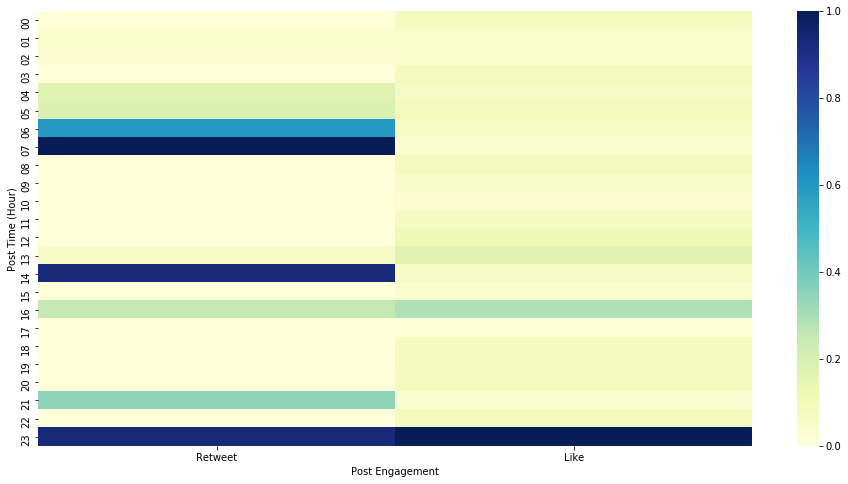

In [23]:
df_en_post_heatmap = df_en_post_avg[['retweet_percent', 'like_percent']]
plt.subplots(figsize=(16, 8))
g = sns.heatmap(df_en_post_heatmap, cmap = 'YlGnBu')
g.set_xticklabels(['Retweet','Like'])
plt.xlabel('Post Engagement')
plt.ylabel('Post Time (Hour)')
plt.show()

### Keyword Analysis
In this section, let us see what common keywords are used in the entire DJ community. Clearly, "turntable," "hip hop," "party," etc., are commonly used in these posts. Likewise, it is good to see the common keywords per brand. Here are posts with a "Pioneer" keyword mention "controller," "mixer," "tutorial," etc., as well as "David Guetta", who is a world-known DJ. The posts with a "Numark" keyword mention "controller," "vinyl," "price," etc., as well as "Serato" and "Ableton", which are DJ and music production software. As for Rane, the posts mention "Serato," "company," "virtual," etc. The interesting keyword here is "djsixty7even7,"  which should be investigated. Next, the posts relating to "Denon" mention "controller," "price," "interface," etc.

In [24]:
def similar_color_blue(word=None, font_size=None, position=None, orientation=None,
font_path=None, random_state=None):
    h = 220 # 0 - 360
    s = 60 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

def similar_color_black(word=None, font_size=None, position=None, orientation=None,
font_path=None, random_state=None):
    h = 220 # 0 - 360
    s = 0 # 0 - 100
    l = random_state.randint(10, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

def similar_color_red(word=None, font_size=None, position=None, orientation=None,
font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(10, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

def similar_color_green(word=None, font_size=None, position=None, orientation=None,
font_path=None, random_state=None):
    h = 140 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(10, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

def similar_color_orange(word=None, font_size=None, position=None, orientation=None,
font_path=None, random_state=None):
    h = 40 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(10, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [25]:
stopwords_extra = ['pioneer', 'rane', 'denon', 'numark']

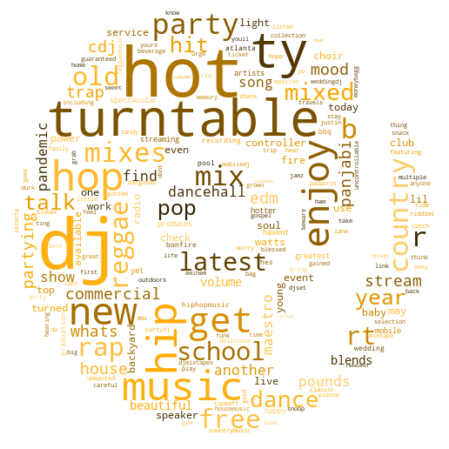

In [26]:
df_text_dj = ' '.join(df_en['text_clean'])
record_picture = 'image/record.jpg'

mask = np.array(Image.open(record_picture))
plt.subplots(figsize=(16, 8))
wc = WordCloud(width=mask.shape[1], height=mask.shape[0], max_font_size=80, 
               collocations=False, mask=mask, background_color='white',
              random_state=44, color_func=similar_color_orange,
              stopwords = stopwords_extra).generate(df_text_dj)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

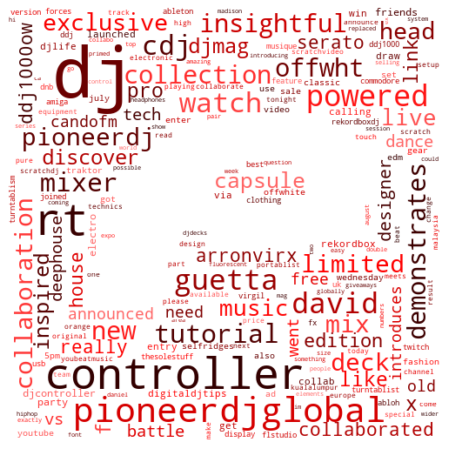

In [27]:
select_pioneer = df_en['text_clean'].str.contains('pioneer', case=False)
df_en_pioneer = df_en[select_pioneer]

pioneer_text = ' '.join(df_en_pioneer['text_clean'])
record_picture = 'image/pioneer.jpg'

mask = np.array(Image.open(record_picture))
plt.subplots(figsize=(16, 8))
wc = WordCloud(width=mask.shape[1], height=mask.shape[0], max_font_size=80, 
               collocations=False, mask=mask, background_color='white',
              random_state=44, color_func=similar_color_red,
              stopwords = stopwords_extra).generate(pioneer_text)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

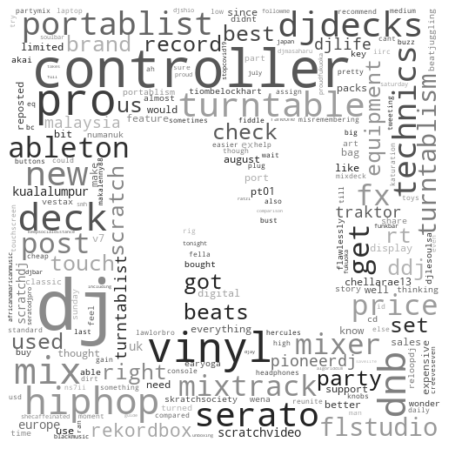

In [28]:
select_numark = df_en['text_clean'].str.contains('numark', case=False)
df_en_numark = df_en[select_numark]

numark_text = ' '.join(df_en_numark['text_clean'])
record_picture = 'image/numark.jpg'

mask = np.array(Image.open(record_picture))
plt.subplots(figsize=(16, 8))
wc = WordCloud(width=mask.shape[1], height=mask.shape[0], max_font_size=80, 
               collocations=False, mask=mask, background_color='white',
              random_state=44, color_func=similar_color_black,
              stopwords = stopwords_extra).generate(numark_text)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

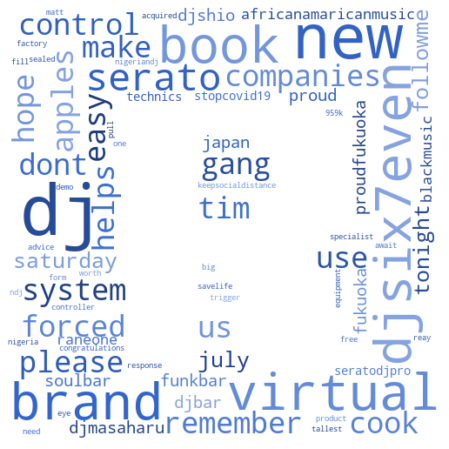

In [29]:
select_rane = df_en['text_clean'].str.contains('rane', case=False)
df_en_rane = df_en[select_rane]

rane_text = ' '.join(df_en_rane['text_clean'])
record_picture = 'image/rane.jpg'

mask = np.array(Image.open(record_picture))
plt.subplots(figsize=(16, 8))
wc = WordCloud(width=mask.shape[1], height=mask.shape[0], max_font_size=80, 
               collocations=False, mask=mask, background_color='white',
              random_state=44, color_func=similar_color_blue,
              stopwords = stopwords_extra).generate(rane_text)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

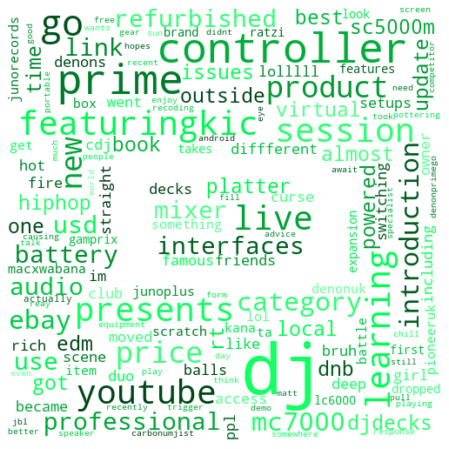

In [30]:
select_denon = df_en['text_clean'].str.contains('denon', case=False)
df_en_denon = df_en[select_denon]

denon_text = ' '.join(df_en_denon['text_clean'])
record_picture = 'image/denon.jpg'

mask = np.array(Image.open(record_picture))
plt.subplots(figsize=(16, 8))
wc = WordCloud(width=mask.shape[1], height=mask.shape[0], max_font_size=80, 
               collocations=False, mask=mask, background_color='white',
              random_state=44, color_func=similar_color_green,
              stopwords = stopwords_extra).generate(denon_text)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

### Popularity Analysis
First, regarding the bar chart below, Pioneer DJ gets the lowest average polarity score. However, it does not mean the brand image of Pioneer DJ is worse than inMusic's brands, Numark, Rane DJ, and Denon DJ. If looking into the box plot, it shows the scores of Numark's posts could go very low, although the average score is higher than Pioneer DJ. The posts relating to Rane DJ are too few so that the number could be biased. As for Denon DJ, it seems the feedback from the users is really better than Pioneer DJ.  

Next, the line chart demonstrates Pioneer DJ is the most popular brand in the entire DJ community. Even though this analysis sums up the posts relating to inMusic's DJ brands, the total number is still lower than Pioneer DJ's post at all times. It tells most people are talking about Pioneer DJ instead of inMusic' brands.

In [31]:
avg_pol_pioneer = round(df_en_pioneer['polarity'].mean(), 2)
avg_pol_numark = round(df_en_numark['polarity'].mean(), 2)
avg_pol_rane = round(df_en_rane['polarity'].mean(), 2)
avg_pol_denon = round(df_en_denon['polarity'].mean(), 2)

x = ['Pioneer DJ', 'Numark', 'Rane DJ', 'Denon DJ']
y = [avg_pol_pioneer, avg_pol_numark, avg_pol_rane, avg_pol_denon]

fig = go.Figure(data=[go.Bar(x=x, y=y, text=y, textposition='auto',
            hovertext=['Average Polarity', 'Average Polarity', 'Average Polarity', 'Average Polarity'])])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text="Average Polarity Score of inMusic's Brand and Pioneer DJ ")
fig.show()

In [32]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_en_pioneer['polarity'],
    name="Pioneer DJ",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all', # represent all points
    marker_color='#FF4136',
    line_color='#FF4136'
))

fig.add_trace(go.Box(
    y=df_en_numark['polarity'],
    name="Numark",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all', # no data points
    marker_color='rgb(0,0,0)',
    line_color='rgb(0,0,0)'
))

fig.add_trace(go.Box(
    y=df_en_rane['polarity'],
    name="Rane DJ",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all', # no data points
    marker_color='rgb(9,56,125)',
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=df_en_denon['polarity'],
    name="Denon DJ",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all', # only outliers
    marker_color='#3D9970',
    line_color='#3D9970'
))


fig.update_layout(title_text="Polarity Score of inMusic's Brands and Pioneer DJ")
fig.show()

In [33]:
df_en_trend = df_en.set_index('date')
df_en_trend.head()

text  \
date                                                                     
2021-07-25 11:39:18  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...   
2021-07-25 11:39:16  Get hot mixes of Hip Hop, R&amp;B, Old School,...   
2021-07-25 11:39:14  Check out this delicious EAR CANDY. Beware! Th...   
2021-07-25 11:22:14  GROWN &amp; SEXY 2 is twice as sexy as the fir...   
2021-07-25 11:21:32  DJ Mixer / Controller on Expert Pro possible? ...   

                     retweets  likes             name retweet_from language  \
date                                                                          
2021-07-25 11:39:18         0      0     TurntableTy1          NaN       en   
2021-07-25 11:39:16         0      0         VippusaO          NaN       en   
2021-07-25 11:39:14         0      0  TomthunkitsMind          NaN       en   
2021-07-25 11:22:14         0      0     TurntableTy1          NaN       en   
2021-07-25 11:21:32         0      0     devialetchat          NaN       en   

                                                            text_clean  \
date                                                                     
2021-07-25 11:39:18  triple fire hot hot hot eargasms du jour volum...   
2021-07-25 11:39:16  get hot mixes hip hop r b old school dance pop...   
2021-07-25 11:39:14  check delicious ear candy beware sweet mixes m...   
2021-07-25 11:22:14  grown sexy 2 twice sexy first one resemblance ...   
2021-07-25 11:21:32            dj mixer controller expert pro possible   

                     tokens  polarity  subjectivity  
date                                                 
2021-07-25 11:39:18      24  0.380952      0.771429  
2021-07-25 11:39:16      32  0.192045      0.488068  
2021-07-25 11:39:14      32  0.371591      0.526136  
2021-07-25 11:22:14      23  0.416667      0.777778  
2021-07-25 11:21:32       6  0.000000      1.000000

In [34]:
bool_pioneer = df_en_trend['text_clean'].str.contains('pioneer', case=False)
pioneer_day = bool_pioneer.resample('1d').sum()
pioneer_day

date
2021-07-16     2.0
2021-07-17    28.0
2021-07-18    17.0
2021-07-19    40.0
2021-07-20    17.0
2021-07-21    12.0
2021-07-22    17.0
2021-07-23    22.0
2021-07-24    19.0
2021-07-25     9.0
Freq: D, Name: text_clean, dtype: float64

In [35]:
bool_numark = df_en_trend['text_clean'].str.contains('numark', case=False)
bool_rane = df_en_trend['text_clean'].str.contains('rane', case=False)
bool_denon = df_en_trend['text_clean'].str.contains('denon', case=False)
bool_inmusic = bool_numark | bool_rane | bool_denon
inmusic_day = bool_inmusic.resample('1d').sum()
inmusic_day

date
2021-07-16     1.0
2021-07-17     6.0
2021-07-18    14.0
2021-07-19     5.0
2021-07-20    11.0
2021-07-21     5.0
2021-07-22     3.0
2021-07-23    11.0
2021-07-24    11.0
2021-07-25     6.0
Freq: D, Name: text_clean, dtype: float64

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=pioneer_day.index,
    y=pioneer_day,
    line_color='rgb(0,100,80)',
    showlegend=True,
    name='Posts Mention Pioneer',
))
fig.add_trace(go.Scatter(
    x=inmusic_day.index, 
    y=inmusic_day,
    line_color='rgb(231,107,243)',
    showlegend=True,
    name='Posts Mention Numark, Denon, Rane (inMusic Brands)',
))
fig.update_layout({  
      'showlegend':True, 'legend':{'x':0.5, 'y':0.96, 'bgcolor':'rgb(246, 228, 129)'}
      })
fig.update_xaxes(
        title_text = "Oct 2020",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Average Mention Times",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_traces(mode='lines')
fig.show()

### Network Analysis
The purpose of this section is to figure out who are the key users connecting different small communities. After choosing only retweet posts, there are only 337 messages left for network analysis. When looking into the network graphic, there are several key users shown on it. For example, a long trace connects 2 huge groups. There are 3 key users on this trace, Zinfuryanno, DJTimesMag, and DANNYFURLONGDJ. Once any one of these 3 users leaves, the huge community will split into 2 groups. Moreover, there are small communities around ItsJeffreyJeff, classicsdujour, tomthunkitsMind, Lorenzosbeats, thelittleidiot, etc. as the centers.

In [37]:
dj_network = df_en[['name', 'retweet_from']]
dj_network

name     retweet_from
0        TurntableTy1              NaN
1            VippusaO              NaN
2     TomthunkitsMind              NaN
3        TurntableTy1              NaN
4        devialetchat              NaN
...               ...              ...
2065      AlekseiBear  TomthunkitsMind
2066       nadiasindi  TomthunkitsMind
2067     natervader13              NaN
2068  TomthunkitsMind              NaN
2069         VippusaO              NaN

[2006 rows x 2 columns]

In [38]:
dj_network = dj_network.dropna(axis=0)
dj_network

name     retweet_from
8     _CrazyNairobian     _Willyboy254
9         mrsarsenal_     _Willyboy254
10       _Willyboy254     _Willyboy254
27        MaguyBoivin  DavidGuettashow
33          shelagh99  TomthunkitsMind
...               ...              ...
2060  SimoneAntonioni     modeselektor
2061      JunUsagi518        GRRLmusic
2063      Zinfuryanno       DJTimesMag
2065      AlekseiBear  TomthunkitsMind
2066       nadiasindi  TomthunkitsMind

[339 rows x 2 columns]

In [39]:
dj_network_A = list(dj_network["name"].unique())
dj_network_B = list(dj_network["retweet_from"].unique())
node_list = list(set(dj_network_A + dj_network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in dj_network.iterrows():
    G.add_edges_from([(j["name"],j["retweet_from"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=220)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='electric',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' has {} connections'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Retweet Network',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
iplot(fig)

# Analyze
Here starts building a model to predict the likes and retweets that the posts are going to get by machine learning. First, split the message into two cohorts in terms of retweets and likes. The prediction will distinguish whether the posts are going to get high retweets or likes. Next, prepare the data to train the model. In this part, this analysis will make a text matrix for machine learning. Then, after building the model, the accuracy of the optimized model to predict likes is 60.4% which is not accurate enough. Besides, the optimized model to predict retweets is only 66.7%. The prediction for both retweets and likes is not so ideal. 

The worse situation is a false positive prediction. Posts are predicted that a high number of likes will be, but actually, they get few likes. The false-positive rate to predict likes is 36.4%, which is still a little high. As for predicting retweets, the false positive rate is 26.3%.

In [40]:
df_en['like_core']=pd.qcut(df_en['likes'].rank(method='first'), q=2, labels=range(0,2))
df_en['retweet_core']=pd.qcut(df_en['retweets'].rank(method='first'), q=2, labels=range(0,2))
df_en.head()

date                                               text  \
0 2021-07-25 11:39:18  "Triple Fire" is hot, hot, hot. Eargasms Du Jo...   
1 2021-07-25 11:39:16  Get hot mixes of Hip Hop, R&amp;B, Old School,...   
2 2021-07-25 11:39:14  Check out this delicious EAR CANDY. Beware! Th...   
3 2021-07-25 11:22:14  GROWN &amp; SEXY 2 is twice as sexy as the fir...   
4 2021-07-25 11:21:32  DJ Mixer / Controller on Expert Pro possible? ...   

   retweets  likes             name retweet_from language  \
0         0      0     TurntableTy1          NaN       en   
1         0      0         VippusaO          NaN       en   
2         0      0  TomthunkitsMind          NaN       en   
3         0      0     TurntableTy1          NaN       en   
4         0      0     devialetchat          NaN       en   

                                          text_clean  tokens  polarity  \
0  triple fire hot hot hot eargasms du jour volum...      24  0.380952   
1  get hot mixes hip hop r b old school dance pop...      32  0.192045   
2  check delicious ear candy beware sweet mixes m...      32  0.371591   
3  grown sexy 2 twice sexy first one resemblance ...      23  0.416667   
4            dj mixer controller expert pro possible       6  0.000000   

   subjectivity like_core retweet_core  
0      0.771429         0            0  
1      0.488068         0            0  
2      0.526136         0            0  
3      0.777778         0            0  
4      1.000000         0            0

In [41]:
TV = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), 
                        max_features=1000,token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df_en['text_clean'])
df_en_tranformed = TV.transform(df_en['text_clean'])
df_en_text_matrix = pd.DataFrame(df_en_tranformed.toarray(), columns=TV.get_feature_names())
print(df_en_text_matrix.shape)
df_en_text_matrix.head()

(2006, 1000)


able  able afford  ableton  afford  afford saved  allow  allow introduce  \
0   0.0          0.0      0.0     0.0           0.0    0.0              0.0   
1   0.0          0.0      0.0     0.0           0.0    0.0              0.0   
2   0.0          0.0      0.0     0.0           0.0    0.0              0.0   
3   0.0          0.0      0.0     0.0           0.0    0.0              0.0   
4   0.0          0.0      0.0     0.0           0.0    0.0              0.0   

   announced  announced candofm  arronvirx  ...  youll hearing  young  \
0        0.0                0.0        0.0  ...            0.0    0.0   
1        0.0                0.0        0.0  ...            0.0    0.0   
2        0.0                0.0        0.0  ...            0.0    0.0   
3        0.0                0.0        0.0  ...            0.0    0.0   
4        0.0                0.0        0.0  ...            0.0    0.0   

   young dolph  young stoner  young thug  youngens  youngens dj  youre  \
0          0.0           0.0         0.0       0.0          0.0    0.0   
1          0.0           0.0         0.0       0.0          0.0    0.0   
2          0.0           0.0         0.0       0.0          0.0    0.0   
3          0.0           0.0         0.0       0.0          0.0    0.0   
4          0.0           0.0         0.0       0.0          0.0    0.0   

   youre gym  youtube  
0        0.0      0.0  
1        0.0      0.0  
2        0.0      0.0  
3        0.0      0.0  
4        0.0      0.0  

[5 rows x 1000 columns]

In [42]:
X = df_en_text_matrix
y = df_en['like_core']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

print('Test Accuracy (Like) -', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))
print("Test Classification Report (Like)\n", classification_report(y_test, y_predicted))

Test Accuracy (Like) - 0.5920398009950248
[[140  56]
 [108  98]]
Test Classification Report (Like)
               precision    recall  f1-score   support

           0       0.56      0.71      0.63       196
           1       0.64      0.48      0.54       206

    accuracy                           0.59       402
   macro avg       0.60      0.60      0.59       402
weighted avg       0.60      0.59      0.59       402



In [43]:
X = df_en_text_matrix
y = df_en['like_core']

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['none', 'l2']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=44)
logreg_GS = GridSearchCV(logreg, param_grid=param_grid,
                 refit=True, cv=3, n_jobs=24)
logreg_GS.fit(X_train, y_train)
logreg_best = logreg_GS.best_estimator_
logreg_best.fit(X_train, y_train)
y_predicted = logreg_best.predict(X_test)

print("Tuned Logistic Regression Parameter: {}".format(logreg_GS.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_GS.best_score_))
print('Test Accuracy (Like) -', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))
print("Test Classification Report (Like)\n", classification_report(y_test, y_predicted))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.617817681169566
Test Accuracy (Like) - 0.6044776119402985
[[133  63]
 [ 96 110]]
Test Classification Report (Like)
               precision    recall  f1-score   support

           0       0.58      0.68      0.63       196
           1       0.64      0.53      0.58       206

    accuracy                           0.60       402
   macro avg       0.61      0.61      0.60       402
weighted avg       0.61      0.60      0.60       402



In [44]:
X = df_en_text_matrix
y = df_en['like_core']

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['none', 'l2']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=44)
logreg_GS = GridSearchCV(logreg, param_grid=param_grid,
                 refit=True, cv=3, n_jobs=24)
logreg_GS.fit(X_train, y_train)
y_predicted = logreg_GS.predict(X_test)

print("Tuned Logistic Regression Parameter: {}".format(logreg_GS.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_GS.best_score_))
print('Test Accuracy (Like) -', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))
print("Test Classification Report (Like)\n", classification_report(y_test, y_predicted))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.617817681169566
Test Accuracy (Like) - 0.6044776119402985
[[133  63]
 [ 96 110]]
Test Classification Report (Like)
               precision    recall  f1-score   support

           0       0.58      0.68      0.63       196
           1       0.64      0.53      0.58       206

    accuracy                           0.60       402
   macro avg       0.61      0.61      0.60       402
weighted avg       0.61      0.60      0.60       402



In [45]:
confu_matrix = confusion_matrix(y_test, y_predicted)
true_positive = confu_matrix[1][1] / (confu_matrix[0][1] + confu_matrix[1][1])
false__positive = confu_matrix[0][1] / (confu_matrix[0][1] + confu_matrix[1][1])
true_negative = confu_matrix[0][0] / (confu_matrix[0][0] + confu_matrix[1][0])
print('True Positive Rate:', true_positive)
print('False Positive Rate:', false__positive)
print('True Negative Rate:', true_negative)

True Positive Rate: 0.6358381502890174
False Positive Rate: 0.36416184971098264
True Negative Rate: 0.5807860262008734


In [46]:
X = df_en_text_matrix
y = df_en['retweet_core']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

print('Test Accuracy (Retweet) -', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))
print("Test Classification Report (Retweet)\n", classification_report(y_test, y_predicted))

Test Accuracy (Retweet) - 0.6592039800995025
[[167  38]
 [ 99  98]]
Test Classification Report (Retweet)
               precision    recall  f1-score   support

           0       0.63      0.81      0.71       205
           1       0.72      0.50      0.59       197

    accuracy                           0.66       402
   macro avg       0.67      0.66      0.65       402
weighted avg       0.67      0.66      0.65       402



In [47]:
X = df_en_text_matrix
y = df_en['retweet_core']

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['none', 'l2']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
logreg = LogisticRegression(max_iter=1000, random_state=44)
logreg_GS = GridSearchCV(logreg, param_grid=param_grid,
                 refit=True, cv=3, n_jobs=24)
logreg_GS.fit(X_train, y_train)
logreg_best = logreg_GS.best_estimator_
logreg_best.fit(X_train, y_train)
y_predicted = logreg_best.predict(X_test)

print("Tuned Logistic Regression Parameter: {}".format(logreg_GS.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_GS.best_score_))
print('Test Accuracy (Retweet) -', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))
print("Test Classification Report (Retweet)\n", classification_report(y_test, y_predicted))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.6533725366656166
Test Accuracy (Retweet) - 0.6666666666666666
[[170  35]
 [ 99  98]]
Test Classification Report (Retweet)
               precision    recall  f1-score   support

           0       0.63      0.83      0.72       205
           1       0.74      0.50      0.59       197

    accuracy                           0.67       402
   macro avg       0.68      0.66      0.66       402
weighted avg       0.68      0.67      0.66       402



In [48]:
confu_matrix = confusion_matrix(y_test, y_predicted)
true_positive = confu_matrix[1][1] / (confu_matrix[0][1] + confu_matrix[1][1])
false__positive = confu_matrix[0][1] / (confu_matrix[0][1] + confu_matrix[1][1])
true_negative = confu_matrix[0][0] / (confu_matrix[0][0] + confu_matrix[1][0])
print('True Positive Rate:', true_positive)
print('False Positive Rate:', false__positive)
print('True Negative Rate:', true_negative)

True Positive Rate: 0.7368421052631579
False Positive Rate: 0.2631578947368421
True Negative Rate: 0.6319702602230484


# Conclusion
In sum, here are viewpoints as below.

1. Posting at 11 pm would get both high retweets and high likes. As for retweets, posting at 7 am and 2 pm would also get high retweets.

2. "turntable" and "controller" are commonly used in DJ-related posts. The posts containing "Pioneer" mention "mixer," "tutorial," "David Guetta," etc. As for the posts containing the names of inMusic's brands, "price," "Serato," and "interface," etc., are the common keywords.

3. Although the average polarity score of Pioneer DJ's posts is not as high as inMusic's, Pioneer DJ is more popular that dominate the higher proportion of the posts.

4. Zinfuryanno, DJTimesMag, and DANNYFURLONGDJ are the key users bringing several major communities together. Plus, ItsJeffreyJeff, classicsdujour, tomthunkitsMind, Lorenzosbeats, thelittleidiot, etc., are important users creating some small communities.

5. The prediction model is not ideal. Only 60.4% of accuracy to predict likes and 66.7% of accuracy to predict retweets. It tells there is too much noise inside the training materials.

The prediction is still positive, although the numbers are not ideal. The model still could be a short-term countermeasure. As for a long term solution, it just needs an improvement. Thus, the Suggested further analysis.

1. Determine where the noise is and then improve the matrix to train the model.

2. Use other machine learning methods for deeper analysis and prediction.

3. Improve the prediction by a pipeline method.